# Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.

Мы научимся обрабатывать пропуски в данных для количественных (числовых) и категориальных признаков и масштабировать данные. Также мы научимся преобразовывать категориальные признаки в числовые.

### В чем состоит проблема?

- Если в данных есть пропуски, то большинство алгоритмов машинного обучения не будут с ними работать. Даже корреляционная матрица не будет строиться корректно.
- Большинство алгоритмов машинного обучения требуют явного перекодирования категориальных признаков в числовые. Даже если алгоритм не требует этого явно, такое перекодирование возможно стоит попробовать, чтобы повысить качество модели.
- Большинство алгоритмов показывает лучшее качество на масштабированных признаках, в особенности алгоритмы, использующие методы градиентного спуска.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

## Загрузка и первичный анализ данных

Используем данные из(https://www.kaggle.com/datasets/gauravkumar2525/shark-attacks?resource=download)

In [10]:
# Будем использовать только обучающую выборку
data = pd.read_csv('../datasets/global_shark_attacks.csv', sep=",")

In [11]:
# размер набора данных
data.shape

(6890, 13)

In [12]:
# типы колонок
data.dtypes

date          object
year         float64
type          object
country       object
area          object
location      object
activity      object
name          object
sex           object
age           object
fatal_y_n     object
time          object
species       object
dtype: object

In [13]:
# проверим есть ли пропущенные значения
data.isnull().sum()

date          303
year          132
type           19
country        51
area          481
location      565
activity      586
name          220
sex           572
age          2987
fatal_y_n       0
time         3518
species      3118
dtype: int64

In [14]:
# Первые 5 строк датасета
data.head()

,date,year,type,country,area,location,activity,name,sex,age,fatal_y_n,time,species
0,2023-05-13,2023.0,Unprovoked,AUSTRALIA,South Australia,Elliston,Surfing,Simon Baccanello,M,46,Y,10h10,White shark
1,2023-04-29,2023.0,Unprovoked,AUSTRALIA,Western Australia,"Yallingup, Busselton",Swimming,male,M,NaN,N,11h20,1m shark
2,2022-10-07,2022.0,Unprovoked,AUSTRALIA,Western Australia,Port Hedland,Spearfishing,Robbie Peck,M,38,N,11h30,Bull shark
3,2021-10-04,2021.0,Unprovoked,USA,Florida,"Fort Pierce State Park, St. Lucie County",Surfing,Truman Van Patrick,M,25.0,N,NaN,NaN
4,2021-10-03,2021.0,Unprovoked,USA,Florida,"Jensen Beach, Martin County",Swimming,male,M,NaN,N,12h00,NaN


In [15]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 6890


# Обработка пропусков в данных

## Простые стратегии - удаление или заполнение нулями

Удаление колонок, содержащих пустые значения
`res = data.dropna(axis=1, how='any')`

Удаление строк, содержащих пустые значения
`res = data.dropna(axis=0, how='any')`

[Документация](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)

**Удаление может производиться для группы строк или колонок.**

In [16]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((6890, 13), (6890, 1))

In [17]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((6890, 13), (1653, 13))

In [18]:
data.head()

,date,year,type,country,area,location,activity,name,sex,age,fatal_y_n,time,species
0,2023-05-13,2023.0,Unprovoked,AUSTRALIA,South Australia,Elliston,Surfing,Simon Baccanello,M,46,Y,10h10,White shark
1,2023-04-29,2023.0,Unprovoked,AUSTRALIA,Western Australia,"Yallingup, Busselton",Swimming,male,M,NaN,N,11h20,1m shark
2,2022-10-07,2022.0,Unprovoked,AUSTRALIA,Western Australia,Port Hedland,Spearfishing,Robbie Peck,M,38,N,11h30,Bull shark
3,2021-10-04,2021.0,Unprovoked,USA,Florida,"Fort Pierce State Park, St. Lucie County",Surfing,Truman Van Patrick,M,25.0,N,NaN,NaN
4,2021-10-03,2021.0,Unprovoked,USA,Florida,"Jensen Beach, Martin County",Swimming,male,M,NaN,N,12h00,NaN


In [19]:
# Заполнение всех пропущенных значений нулями
# В данном случае это некорректно, так как нулями заполняются в том числе категориальные колонки
data_new_3 = data.fillna(0)
data_new_3.head()

,date,year,type,country,area,location,activity,name,sex,age,fatal_y_n,time,species
0,2023-05-13,2023.0,Unprovoked,AUSTRALIA,South Australia,Elliston,Surfing,Simon Baccanello,M,46,Y,10h10,White shark
1,2023-04-29,2023.0,Unprovoked,AUSTRALIA,Western Australia,"Yallingup, Busselton",Swimming,male,M,0,N,11h20,1m shark
2,2022-10-07,2022.0,Unprovoked,AUSTRALIA,Western Australia,Port Hedland,Spearfishing,Robbie Peck,M,38,N,11h30,Bull shark
3,2021-10-04,2021.0,Unprovoked,USA,Florida,"Fort Pierce State Park, St. Lucie County",Surfing,Truman Van Patrick,M,25.0,N,0,0
4,2021-10-03,2021.0,Unprovoked,USA,Florida,"Jensen Beach, Martin County",Swimming,male,M,0,N,12h00,0


## "Внедрение значений" - импьютация (imputation)

### Обработка пропусков в числовых данных

In [20]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка year. Тип данных float64. Количество пустых значений 132, 1.92%.


In [21]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,year
0,2023.0
1,2023.0
2,2022.0
3,2021.0
4,2021.0
...,...
6885,NaN
6886,NaN
6887,NaN
6888,NaN


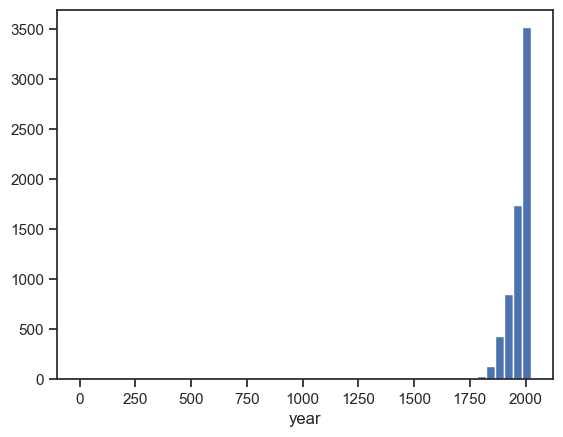

In [22]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

Будем использовать встроенные средства импьютации библиотеки scikit-learn - https://scikit-learn.org/stable/modules/impute.html

In [24]:
data_num_MasVnrArea = data_num[['year']]
data_num_MasVnrArea.head()

,year
0,2023.0
1,2023.0
2,2022.0
3,2021.0
4,2021.0


In [26]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [27]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_MasVnrArea)
mask_missing_values_only

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]], shape=(6890, 1))

С помощью класса [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer) можно проводить импьютацию различными [показателями центра распределения](https://ru.wikipedia.org/wiki/%D0%9F%D0%BE%D0%BA%D0%B0%D0%B7%D0%B0%D1%82%D0%B5%D0%BB%D0%B8_%D1%86%D0%B5%D0%BD%D1%82%D1%80%D0%B0_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D1%8F)

In [28]:
strategies=['mean', 'median', 'most_frequent']

In [29]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_MasVnrArea)
    return data_num_imp[mask_missing_values_only]

In [30]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([1970.93592779, 1970.93592779, 1970.93592779, 1970.93592779,
        1970.93592779, 1970.93592779, 1970.93592779, 1970.93592779,
        1970.93592779, 1970.93592779, 1970.93592779, 1970.93592779,
        1970.93592779, 1970.93592779, 1970.93592779, 1970.93592779,
        1970.93592779, 1970.93592779, 1970.93592779, 1970.93592779,
        1970.93592779, 1970.93592779, 1970.93592779, 1970.93592779,
        1970.93592779, 1970.93592779, 1970.93592779, 1970.93592779,
        1970.93592779, 1970.93592779, 1970.93592779, 1970.93592779,
        1970.93592779, 1970.93592779, 1970.93592779, 1970.93592779,
        1970.93592779, 1970.93592779, 1970.93592779, 1970.93592779,
        1970.93592779, 1970.93592779, 1970.93592779, 1970.93592779,
        1970.93592779, 1970.93592779, 1970.93592779, 1970.93592779,
        1970.93592779, 1970.93592779, 1970.93592779, 1970.93592779,
        1970.93592779, 1970.93592779, 1970.93592779, 1970.93592779,
        1970.93592779, 1970.93592779, 1

In [31]:
strategies[1], test_num_impute(strategies[1])

('median',
 array([1986., 1986., 1986., 1986., 1986., 1986., 1986., 1986., 1986.,
        1986., 1986., 1986., 1986., 1986., 1986., 1986., 1986., 1986.,
        1986., 1986., 1986., 1986., 1986., 1986., 1986., 1986., 1986.,
        1986., 1986., 1986., 1986., 1986., 1986., 1986., 1986., 1986.,
        1986., 1986., 1986., 1986., 1986., 1986., 1986., 1986., 1986.,
        1986., 1986., 1986., 1986., 1986., 1986., 1986., 1986., 1986.,
        1986., 1986., 1986., 1986., 1986., 1986., 1986., 1986., 1986.,
        1986., 1986., 1986., 1986., 1986., 1986., 1986., 1986., 1986.,
        1986., 1986., 1986., 1986., 1986., 1986., 1986., 1986., 1986.,
        1986., 1986., 1986., 1986., 1986., 1986., 1986., 1986., 1986.,
        1986., 1986., 1986., 1986., 1986., 1986., 1986., 1986., 1986.,
        1986., 1986., 1986., 1986., 1986., 1986., 1986., 1986., 1986.,
        1986., 1986., 1986., 1986., 1986., 1986., 1986., 1986., 1986.,
        1986., 1986., 1986., 1986., 1986., 1986., 1986., 1986., 19

In [32]:
strategies[2], test_num_impute(strategies[2])

('most_frequent',
 array([2015., 2015., 2015., 2015., 2015., 2015., 2015., 2015., 2015.,
        2015., 2015., 2015., 2015., 2015., 2015., 2015., 2015., 2015.,
        2015., 2015., 2015., 2015., 2015., 2015., 2015., 2015., 2015.,
        2015., 2015., 2015., 2015., 2015., 2015., 2015., 2015., 2015.,
        2015., 2015., 2015., 2015., 2015., 2015., 2015., 2015., 2015.,
        2015., 2015., 2015., 2015., 2015., 2015., 2015., 2015., 2015.,
        2015., 2015., 2015., 2015., 2015., 2015., 2015., 2015., 2015.,
        2015., 2015., 2015., 2015., 2015., 2015., 2015., 2015., 2015.,
        2015., 2015., 2015., 2015., 2015., 2015., 2015., 2015., 2015.,
        2015., 2015., 2015., 2015., 2015., 2015., 2015., 2015., 2015.,
        2015., 2015., 2015., 2015., 2015., 2015., 2015., 2015., 2015.,
        2015., 2015., 2015., 2015., 2015., 2015., 2015., 2015., 2015.,
        2015., 2015., 2015., 2015., 2015., 2015., 2015., 2015., 2015.,
        2015., 2015., 2015., 2015., 2015., 2015., 2015., 20

In [33]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [34]:
data[['year']].describe()

,year
count,6758.000000
mean,1970.935928
std,56.227881
min,1.000000
25%,1950.000000
50%,1986.000000
75%,2009.000000
max,2023.000000


In [36]:
test_num_impute_col(data, 'year', strategies[0])

('year',
 'mean',
 132,
 np.float64(1970.9359277892868),
 np.float64(1970.9359277892868))

In [37]:
test_num_impute_col(data, 'year', strategies[1])

('year', 'median', 132, np.float64(1986.0), np.float64(1986.0))

In [38]:
test_num_impute_col(data, 'year', strategies[2])

('year', 'most_frequent', 132, np.float64(2015.0), np.float64(2015.0))

### Обработка пропусков в категориальных данных

In [39]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка date. Тип данных object. Количество пустых значений 303, 4.4%.
Колонка type. Тип данных object. Количество пустых значений 19, 0.28%.
Колонка country. Тип данных object. Количество пустых значений 51, 0.74%.
Колонка area. Тип данных object. Количество пустых значений 481, 6.98%.
Колонка location. Тип данных object. Количество пустых значений 565, 8.2%.
Колонка activity. Тип данных object. Количество пустых значений 586, 8.51%.
Колонка name. Тип данных object. Количество пустых значений 220, 3.19%.
Колонка sex. Тип данных object. Количество пустых значений 572, 8.3%.
Колонка age. Тип данных object. Количество пустых значений 2987, 43.35%.
Колонка time. Тип данных object. Количество пустых значений 3518, 51.06%.
Колонка species. Тип данных object. Количество пустых значений 3118, 45.25%.


**Какие из этих колонок Вы бы выбрали или не выбрали для построения модели?**

Класс SimpleImputer можно использовать для категориальных признаков со стратегиями "most_frequent" или "constant".

In [40]:
cat_temp_data = data[['country']]
cat_temp_data.head()

,country
0,AUSTRALIA
1,AUSTRALIA
2,AUSTRALIA
3,USA
4,USA


In [41]:
cat_temp_data['country'].unique()

array(['AUSTRALIA', 'USA', 'JAMAICA', 'NEW ZEALAND', 'PAPUA NEW GUINEA',
       'FRENCH POLYNESIA', 'CHINA', 'SOUTH AFRICA', 'BAHAMAS',
       'NEW CALEDONIA', 'REUNION', 'PALESTINIAN TERRITORIES', 'BELIZE',
       'PHILIPPINES', 'MOZAMBIQUE', 'KENYA', 'BRAZIL', 'MEXICO', 'FIJI',
       'TANZANIA', 'ENGLAND', 'THAILAND', 'SOUTH KOREA', 'MAURITIUS',
       'ITALY', 'MARSHALL ISLANDS', 'SPAIN', 'TAIWAN', 'TURKEY',
       'SENEGAL', 'BERMUDA', 'AMERICAN SAMOA', 'PACIFIC OCEAN',
       'INDIAN OCEAN', 'NEW GUINEA', 'SOLOMON ISLANDS', 'GREECE',
       'COSTA RICA', 'INDONESIA', 'CUBA', 'GEORGIA', 'SIERRA LEONE',
       'Coast of AFRICA', 'INDIA', 'TOBAGO', 'EGYPT', 'SAMOA',
       'DOMINICAN REPUBLIC', 'MADAGASCAR', 'MALAYSIA', 'GULF OF ADEN',
       'SRI LANKA', 'SOMALIA', 'CHILE', nan, 'SINGAPORE',
       'BRITISH WEST INDIES', 'NORTH ATLANTIC OCEAN', 'JAPAN', 'OKINAWA',
       'SOUTH PACIFIC OCEAN', 'SOUTH ATLANTIC OCEAN', 'CARIBBEAN SEA',
       'ITALY / CROATIA', 'MONTENEGRO', 'YEMEN',

In [42]:
cat_temp_data[cat_temp_data['country'].isnull()].shape

(51, 1)

In [43]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['AUSTRALIA'],
       ['AUSTRALIA'],
       ['AUSTRALIA'],
       ...,
       ['IRAQ'],
       ['SOUTH AFRICA'],
       ['AUSTRALIA']], shape=(6890, 1), dtype=object)

In [44]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array(['ADMIRALTY ISLANDS', 'AFRICA', 'ALGERIA', 'AMERICAN SAMOA',
       'ANDAMAN / NICOBAR ISLANDAS', 'ANDAMAN ISLANDS', 'ANGOLA',
       'ANTIGUA', 'ARGENTINA', 'ARUBA', 'ASIA?', 'ATLANTIC OCEAN',
       'AUSTRALIA', 'AZORES', 'Australia', 'BAHAMAS', 'BAHREIN',
       'BANGLADESH', 'BARBADOS', 'BAY OF BENGAL', 'BELIZE', 'BERMUDA',
       'BRAZIL', 'BRITISH ISLES', 'BRITISH NEW GUINEA',
       'BRITISH VIRGIN ISLANDS', 'BRITISH WEST INDIES', 'BURMA',
       'Between PORTUGAL & INDIA', 'British Overseas Territory', 'CANADA',
       'CAPE VERDE', 'CARIBBEAN SEA', 'CAYMAN ISLANDS', 'CENTRAL PACIFIC',
       'CEYLON', 'CEYLON (SRI LANKA)', 'CHILE', 'CHINA', 'COLOMBIA',
       'COLUMBIA', 'COMOROS', 'COOK ISLANDS', 'COSTA RICA', 'CRETE',
       'CROATIA', 'CUBA', 'CURACAO', 'CYPRUS', 'Coast of AFRICA',
       'DIEGO GARCIA', 'DJIBOUTI', 'DOMINICAN REPUBLIC', 'ECUADOR',
       'EGYPT', 'EGYPT / ISRAEL', 'EL SALVADOR', 'ENGLAND',
       'EQUATORIAL GUINEA / CAMEROON', 'FALKLAND ISLANDS',
  

In [45]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['AUSTRALIA'],
       ['AUSTRALIA'],
       ['AUSTRALIA'],
       ...,
       ['IRAQ'],
       ['SOUTH AFRICA'],
       ['AUSTRALIA']], shape=(6890, 1), dtype=object)

In [46]:
np.unique(data_imp3)

array(['ADMIRALTY ISLANDS', 'AFRICA', 'ALGERIA', 'AMERICAN SAMOA',
       'ANDAMAN / NICOBAR ISLANDAS', 'ANDAMAN ISLANDS', 'ANGOLA',
       'ANTIGUA', 'ARGENTINA', 'ARUBA', 'ASIA?', 'ATLANTIC OCEAN',
       'AUSTRALIA', 'AZORES', 'Australia', 'BAHAMAS', 'BAHREIN',
       'BANGLADESH', 'BARBADOS', 'BAY OF BENGAL', 'BELIZE', 'BERMUDA',
       'BRAZIL', 'BRITISH ISLES', 'BRITISH NEW GUINEA',
       'BRITISH VIRGIN ISLANDS', 'BRITISH WEST INDIES', 'BURMA',
       'Between PORTUGAL & INDIA', 'British Overseas Territory', 'CANADA',
       'CAPE VERDE', 'CARIBBEAN SEA', 'CAYMAN ISLANDS', 'CENTRAL PACIFIC',
       'CEYLON', 'CEYLON (SRI LANKA)', 'CHILE', 'CHINA', 'COLOMBIA',
       'COLUMBIA', 'COMOROS', 'COOK ISLANDS', 'COSTA RICA', 'CRETE',
       'CROATIA', 'CUBA', 'CURACAO', 'CYPRUS', 'Coast of AFRICA',
       'DIEGO GARCIA', 'DJIBOUTI', 'DOMINICAN REPUBLIC', 'ECUADOR',
       'EGYPT', 'EGYPT / ISRAEL', 'EL SALVADOR', 'ENGLAND',
       'EQUATORIAL GUINEA / CAMEROON', 'FALKLAND ISLANDS',
  

In [47]:
data_imp3[data_imp3=='NA'].size

51

# Преобразование категориальных признаков в числовые

In [48]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,AUSTRALIA
1,AUSTRALIA
2,AUSTRALIA
3,USA
4,USA
...,...
6885,GREECE
6886,INDONESIA
6887,IRAQ
6888,SOUTH AFRICA


## Кодирование категорий целочисленными значениями (label encoding)

В этом случае уникальные значения категориального признака кодируются целыми числами.

В scikit-learn для такого кодирования используется два класса :

- [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) - который ориентирован на применение к одному признаку. Этот класс прежде всего предназначен для кодирования целевого признака, но может быть также использован для последовательного кодирования отдельных нецелевых признаков.
- [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html) - который ориентирован на применение к матрице объект-признак, то есть для кодирования матрицы нецелевых признаков.

### Использование LabelEncoder

In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
cat_enc['c1'].unique()

array(['AUSTRALIA', 'USA', 'JAMAICA', 'NEW ZEALAND', 'PAPUA NEW GUINEA',
       'FRENCH POLYNESIA', 'CHINA', 'SOUTH AFRICA', 'BAHAMAS',
       'NEW CALEDONIA', 'REUNION', 'PALESTINIAN TERRITORIES', 'BELIZE',
       'PHILIPPINES', 'MOZAMBIQUE', 'KENYA', 'BRAZIL', 'MEXICO', 'FIJI',
       'TANZANIA', 'ENGLAND', 'THAILAND', 'SOUTH KOREA', 'MAURITIUS',
       'ITALY', 'MARSHALL ISLANDS', 'SPAIN', 'TAIWAN', 'TURKEY',
       'SENEGAL', 'BERMUDA', 'AMERICAN SAMOA', 'PACIFIC OCEAN',
       'INDIAN OCEAN', 'NEW GUINEA', 'SOLOMON ISLANDS', 'GREECE',
       'COSTA RICA', 'INDONESIA', 'CUBA', 'GEORGIA', 'SIERRA LEONE',
       'Coast of AFRICA', 'INDIA', 'TOBAGO', 'EGYPT', 'SAMOA',
       'DOMINICAN REPUBLIC', 'MADAGASCAR', 'MALAYSIA', 'GULF OF ADEN',
       'SRI LANKA', 'SOMALIA', 'CHILE', 'SINGAPORE',
       'BRITISH WEST INDIES', 'NORTH ATLANTIC OCEAN', 'JAPAN', 'OKINAWA',
       'SOUTH PACIFIC OCEAN', 'SOUTH ATLANTIC OCEAN', 'CARIBBEAN SEA',
       'ITALY / CROATIA', 'MONTENEGRO', 'YEMEN', 'VIE

In [51]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [52]:
# Наименования категорий в соответствии с порядковыми номерами

# Свойство называется classes, потому что предполагается что мы решаем 
# задачу классификации и каждое значение категории соответствует 
# какому-либо классу целевого признака

le.classes_

array(['ADMIRALTY ISLANDS', 'AFRICA', 'ALGERIA', 'AMERICAN SAMOA',
       'ANDAMAN / NICOBAR ISLANDAS', 'ANDAMAN ISLANDS', 'ANGOLA',
       'ANTIGUA', 'ARGENTINA', 'ARUBA', 'ASIA?', 'ATLANTIC OCEAN',
       'AUSTRALIA', 'AZORES', 'Australia', 'BAHAMAS', 'BAHREIN',
       'BANGLADESH', 'BARBADOS', 'BAY OF BENGAL', 'BELIZE', 'BERMUDA',
       'BRAZIL', 'BRITISH ISLES', 'BRITISH NEW GUINEA',
       'BRITISH VIRGIN ISLANDS', 'BRITISH WEST INDIES', 'BURMA',
       'Between PORTUGAL & INDIA', 'British Overseas Territory', 'CANADA',
       'CAPE VERDE', 'CARIBBEAN SEA', 'CAYMAN ISLANDS', 'CENTRAL PACIFIC',
       'CEYLON', 'CEYLON (SRI LANKA)', 'CHILE', 'CHINA', 'COLOMBIA',
       'COLUMBIA', 'COMOROS', 'COOK ISLANDS', 'COSTA RICA', 'CRETE',
       'CROATIA', 'CUBA', 'CURACAO', 'CYPRUS', 'Coast of AFRICA',
       'DIEGO GARCIA', 'DJIBOUTI', 'DOMINICAN REPUBLIC', 'ECUADOR',
       'EGYPT', 'EGYPT / ISRAEL', 'EL SALVADOR', 'ENGLAND',
       'EQUATORIAL GUINEA / CAMEROON', 'FALKLAND ISLANDS',
  

In [53]:
cat_enc_le

array([ 12,  12,  12, ...,  87, 171,  12], shape=(6890,))

In [54]:
np.unique(cat_enc_le)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [55]:
# В этом примере видно, что перед кодированием 
# уникальные значения признака сортируются в лексикографиеском порядке
le.inverse_transform([0, 1, 2, 3])

array(['ADMIRALTY ISLANDS', 'AFRICA', 'ALGERIA', 'AMERICAN SAMOA'],
      dtype=object)

### Использование OrdinalEncoder

In [56]:
from sklearn.preprocessing import OrdinalEncoder

In [57]:
data_oe = data[['activity', 'country', 'sex']]
data_oe.head()

,activity,country,sex
0,Surfing,AUSTRALIA,M
1,Swimming,AUSTRALIA,M
2,Spearfishing,AUSTRALIA,M
3,Surfing,USA,M
4,Swimming,USA,M


In [58]:
imp4 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_oe_filled = imp4.fit_transform(data_oe)
data_oe_filled

array([['Surfing', 'AUSTRALIA', 'M'],
       ['Swimming', 'AUSTRALIA', 'M'],
       ['Spearfishing', 'AUSTRALIA', 'M'],
       ...,
       ['Swimming', 'IRAQ', 'M'],
       ['Crew swimming alongside their anchored ship', 'SOUTH AFRICA',
        'M'],
       ['Pearl diving', 'AUSTRALIA', 'M']], shape=(6890, 3), dtype=object)

In [59]:
oe = OrdinalEncoder()
cat_enc_oe = oe.fit_transform(data_oe_filled)
cat_enc_oe

array([[1166.,   12.,    2.],
       [1202.,   12.,    2.],
       [1055.,   12.,    2.],
       ...,
       [1202.,   87.,    2.],
       [ 244.,  172.,    2.],
       [ 855.,   12.,    2.]], shape=(6890, 3))

In [60]:
# Уникальные значения 1 признака
np.unique(cat_enc_oe[:, 0])

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 1.551e+03, 1.552e+03,
       1.553e+03], shape=(1554,))

In [61]:
# Уникальные значения 2 признака
np.unique(cat_enc_oe[:, 1])

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [62]:
# Уникальные значения 3 признака
np.unique(cat_enc_oe[:, 2])

array([0., 1., 2., 3., 4., 5., 6.])

In [63]:
# Наименования категорий в соответствии с порядковыми номерами
oe.categories_

[array(['.',
        "12 of the Penang's crew were returning to the ship when their 12' dinghy capsized",
        '13 men in the water after sailboat capsized & sank', ...,
        'wreck of the State Oil Company ship Permina', 'yachting accident',
        'yachtsman in a zodiac'], shape=(1554,), dtype=object),
 array(['ADMIRALTY ISLANDS', 'AFRICA', 'ALGERIA', 'AMERICAN SAMOA',
        'ANDAMAN / NICOBAR ISLANDAS', 'ANDAMAN ISLANDS', 'ANGOLA',
        'ANTIGUA', 'ARGENTINA', 'ARUBA', 'ASIA?', 'ATLANTIC OCEAN',
        'AUSTRALIA', 'AZORES', 'Australia', 'BAHAMAS', 'BAHREIN',
        'BANGLADESH', 'BARBADOS', 'BAY OF BENGAL', 'BELIZE', 'BERMUDA',
        'BRAZIL', 'BRITISH ISLES', 'BRITISH NEW GUINEA',
        'BRITISH VIRGIN ISLANDS', 'BRITISH WEST INDIES', 'BURMA',
        'Between PORTUGAL & INDIA', 'British Overseas Territory', 'CANADA',
        'CAPE VERDE', 'CARIBBEAN SEA', 'CAYMAN ISLANDS', 'CENTRAL PACIFIC',
        'CEYLON', 'CEYLON (SRI LANKA)', 'CHILE', 'CHINA', 'COLOMBIA',
 

In [64]:
# Обратное преобразование
oe.inverse_transform(cat_enc_oe)

array([['Surfing', 'AUSTRALIA', 'M'],
       ['Swimming', 'AUSTRALIA', 'M'],
       ['Spearfishing', 'AUSTRALIA', 'M'],
       ...,
       ['Swimming', 'IRAQ', 'M'],
       ['Crew swimming alongside their anchored ship', 'SOUTH AFRICA',
        'M'],
       ['Pearl diving', 'AUSTRALIA', 'M']], shape=(6890, 3), dtype=object)

### Проблемы использования LabelEncoder и OrdinalEncoder

Необходимо отметить, что LabelEncoder и OrdinalEncoder могут использоваться только для категориальных признаков в номинальных шкалах (для которых отсутствует порядок), например города, страны, названия рек и т.д. 

Это связано с тем, что задать какой-либо порядок при кодировании с помощью LabelEncoder и OrdinalEncoder невозможно, они сортируют категории в лексикографическом порядке.

При этом кодирование целыми числами создает фиктивное отношение порядка (1 < 2 < 3 < ...) которого не было в исходных номинальных шкалах. Данное отношение порядка может негативно повлиять на построение модели машинного обучения.

### Кодирование шкал порядка

Библиотека scikit-learn не предоставляет готового решения для кодирования шкал порядка, но можно воспользоваться [функцией map для отдельных объектов Series.](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html)

In [65]:
# пример шкалы порядка 'small' < 'medium' < 'large'
sizes = ['small', 'medium', 'large', 'small', 'medium', 'large', 'small', 'medium', 'large']

In [66]:
pd_sizes = pd.DataFrame(data={'sizes':sizes})
pd_sizes

,sizes
0,small
1,medium
2,large
3,small
4,medium
5,large
6,small
7,medium
8,large


In [67]:
pd_sizes['sizes_codes'] = pd_sizes['sizes'].map({'small':1, 'medium':2, 'large':3})
pd_sizes

,sizes,sizes_codes
0,small,1
1,medium,2
2,large,3
3,small,1
4,medium,2
5,large,3
6,small,1
7,medium,2
8,large,3


In [68]:
pd_sizes['sizes_decoded'] = pd_sizes['sizes_codes'].map({1:'small', 2:'medium', 3:'large'})
pd_sizes

,sizes,sizes_codes,sizes_decoded
0,small,1,small
1,medium,2,medium
2,large,3,large
3,small,1,small
4,medium,2,medium
5,large,3,large
6,small,1,small
7,medium,2,medium
8,large,3,large


## Кодирование категорий наборами бинарных значений - [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

В этом случае каждое уникальное значение признака становится новым отдельным признаком.

In [69]:
from sklearn.preprocessing import OneHotEncoder

In [70]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])

In [71]:
cat_enc.shape

(6890, 1)

In [72]:
cat_enc_ohe.shape

(6890, 215)

In [73]:
cat_enc_ohe

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 6890 stored elements and shape (6890, 215)>

In [74]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], shape=(10, 215))

In [75]:
cat_enc.head(10)

,c1
0,AUSTRALIA
1,AUSTRALIA
2,AUSTRALIA
3,USA
4,USA
5,USA
6,USA
7,JAMAICA
8,USA
9,AUSTRALIA


## [Pandas get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) - быстрый вариант one-hot кодирования

In [76]:
pd.get_dummies(cat_enc).head()

,c1_ADMIRALTY ISLANDS,c1_AFRICA,c1_ALGERIA,c1_AMERICAN SAMOA,c1_ANDAMAN / NICOBAR ISLANDAS,c1_ANDAMAN ISLANDS,c1_ANGOLA,c1_ANTIGUA,c1_ARGENTINA,c1_ARUBA,...,c1_UNITED ARAB EMIRATES (UAE),c1_UNITED KINGDOM,c1_URUGUAY,c1_USA,c1_VANUATU,c1_VENEZUELA,c1_VIETNAM,c1_WEST INDIES,c1_WESTERN SAMOA,c1_YEMEN
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [77]:
pd.get_dummies(cat_temp_data, dummy_na=True).head()

,country_ADMIRALTY ISLANDS,country_AFRICA,country_ALGERIA,country_AMERICAN SAMOA,country_ANDAMAN / NICOBAR ISLANDAS,country_ANDAMAN ISLANDS,country_ANGOLA,country_ANTIGUA,country_ARGENTINA,country_ARUBA,...,country_UNITED KINGDOM,country_URUGUAY,country_USA,country_VANUATU,country_VENEZUELA,country_VIETNAM,country_WEST INDIES,country_WESTERN SAMOA,country_YEMEN,country_nan
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


# Масштабирование данных

Термины "масштабирование" и "нормализация" часто используются как синонимы, но это неверно. Масштабирование предполагает изменение диапазона измерения величины, а нормализация - изменение распределения этой величины. В этом разделе рассматривается только масштабирование.

Если признаки лежат в различных диапазонах, то необходимо их нормализовать. Как правило, применяют два подхода:
- MinMax масштабирование:
$$ x_{новый} = \frac{x_{старый} - min(X)}{max(X)-min(X)} $$

В этом случае значения лежат в диапазоне от 0 до 1.
- Масштабирование данных на основе [Z-оценки](https://ru.wikipedia.org/wiki/Z-%D0%BE%D1%86%D0%B5%D0%BD%D0%BA%D0%B0):
$$ x_{новый} = \frac{x_{старый} - AVG(X) }{\sigma(X)} $$

В этом случае большинство значений попадает в диапазон от -3 до 3.

где $X$ - матрица объект-признак, $AVG(X)$ - среднее значение, $\sigma$ - среднеквадратичное отклонение.

In [78]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

## [MinMax масштабирование](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

In [85]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['year']])

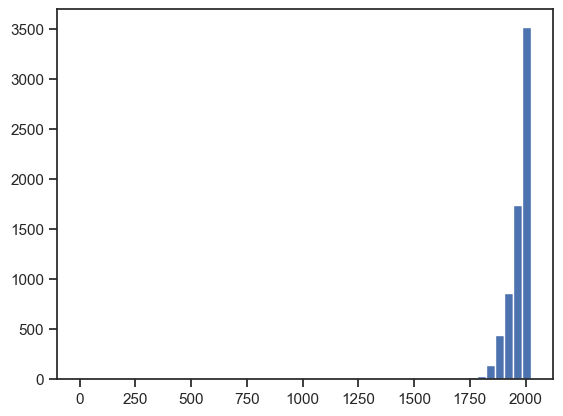

In [86]:
plt.hist(data['year'], 50)
plt.show()

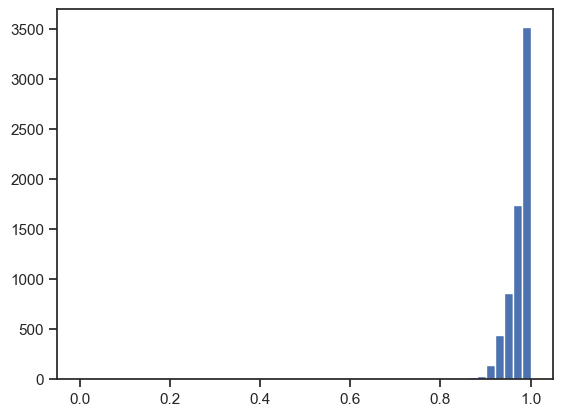

In [87]:
plt.hist(sc1_data, 50)
plt.show()

## Масштабирование данных на основе [Z-оценки](https://ru.wikipedia.org/wiki/Z-%D0%BE%D1%86%D0%B5%D0%BD%D0%BA%D0%B0) - [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)

In [88]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['year']])

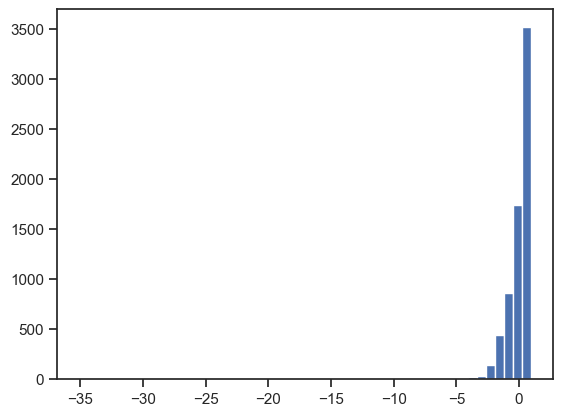

In [89]:
plt.hist(sc2_data, 50)
plt.show()

# Дополнительные источники
- [Руководство scikit-learn по предобработке данных](https://scikit-learn.org/stable/modules/preprocessing.html)
- [Kaggle Data Cleaning Challenge: Handling missing values (упражнения с пояснениями по обработке пропущенных значений и масштабированию признаков)](https://www.kaggle.com/rtatman/data-cleaning-challenge-handling-missing-values)
- [Краткое руководство по категориальным признакам](https://towardsdatascience.com/encoding-categorical-features-21a2651a065c)